In [1]:
import requests
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import qgrid

In [2]:
def get_binance_bars(symbol, interval, startTime, endTime):

    url = "https://api.binance.com/api/v3/klines"

    symbol = 'BTCUSDT'
    interval = '1d'
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000'

    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))

    if (len(df.index) == 0):
        return None

    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]

    return df

In [3]:
get_binance_bars('BTCUSDT', '1d', dt.datetime(2020, 1, 1),dt.datetime(2020, 2, 1))

months = [dt.datetime(2020, i, 1) for i in range(1,13)]
months.append(dt.datetime(2021, 1, 1))
months

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 3, 1, 0, 0),
 datetime.datetime(2020, 4, 1, 0, 0),
 datetime.datetime(2020, 5, 1, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 7, 1, 0, 0),
 datetime.datetime(2020, 8, 1, 0, 0),
 datetime.datetime(2020, 9, 1, 0, 0),
 datetime.datetime(2020, 10, 1, 0, 0),
 datetime.datetime(2020, 11, 1, 0, 0),
 datetime.datetime(2020, 12, 1, 0, 0),
 datetime.datetime(2021, 1, 1, 0, 0)]

In [4]:
df_list = [get_binance_bars('BTCUSDT', '1d', months[i], months[i+1] - dt.timedelta(0,1)) for i in range(0, len(months) - 1)]
df_list

[                          datetime           open           high  \
 2020-01-01 08:00:00  1577836800000  7195.24000000  7255.00000000   
 2020-01-02 08:00:00  1577923200000  7200.77000000  7212.50000000   
 2020-01-03 08:00:00  1578009600000  6965.49000000  7405.00000000   
 2020-01-04 08:00:00  1578096000000  7345.00000000  7404.00000000   
 2020-01-05 08:00:00  1578182400000  7354.19000000  7495.00000000   
 2020-01-06 08:00:00  1578268800000  7357.64000000  7795.34000000   
 2020-01-07 08:00:00  1578355200000  7758.90000000  8207.68000000   
 2020-01-08 08:00:00  1578441600000  8145.92000000  8455.00000000   
 2020-01-09 08:00:00  1578528000000  8054.72000000  8055.96000000   
 2020-01-10 08:00:00  1578614400000  7817.74000000  8199.00000000   
 2020-01-11 08:00:00  1578700800000  8198.86000000  8286.34000000   
 2020-01-12 08:00:00  1578787200000  8020.01000000  8197.00000000   
 2020-01-13 08:00:00  1578873600000  8184.97000000  8196.00000000   
 2020-01-14 08:00:00  157896000000

In [5]:
df = pd.concat(df_list)
df.shape

(366, 6)

<AxesSubplot:>

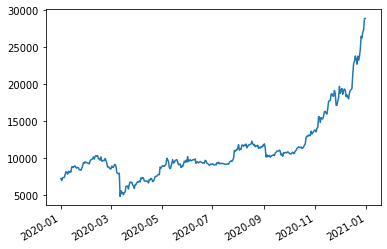

In [8]:
df['close'].astype('float').plot()